<a href="https://colab.research.google.com/github/BishalDali/Usa-House-Prediction/blob/main/BishalDali_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student ID = 2058952                                                                                  
Student Name = Bishal Dali

# **USA House Price Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


**Importing Data in notebook**

In [ ]:
from google.colab import files # Importing the file in google collab
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing (1).csv


**Data Understanding**

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']))
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
#Checking data if it is null in order to clean the columns that might affect the result of prediction
df.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


USA_Housing is the dataset with seven different columns with its own different attributes. This dataset describes the average distribution of data that effects the value of US House. Among those columns Address doesn't contribute as much in this data to predict the house price. While columns like average of "income", "house age","number of rooms","number of bedrooms", "area Population" directly effects the value of house.

**Data Analysis**

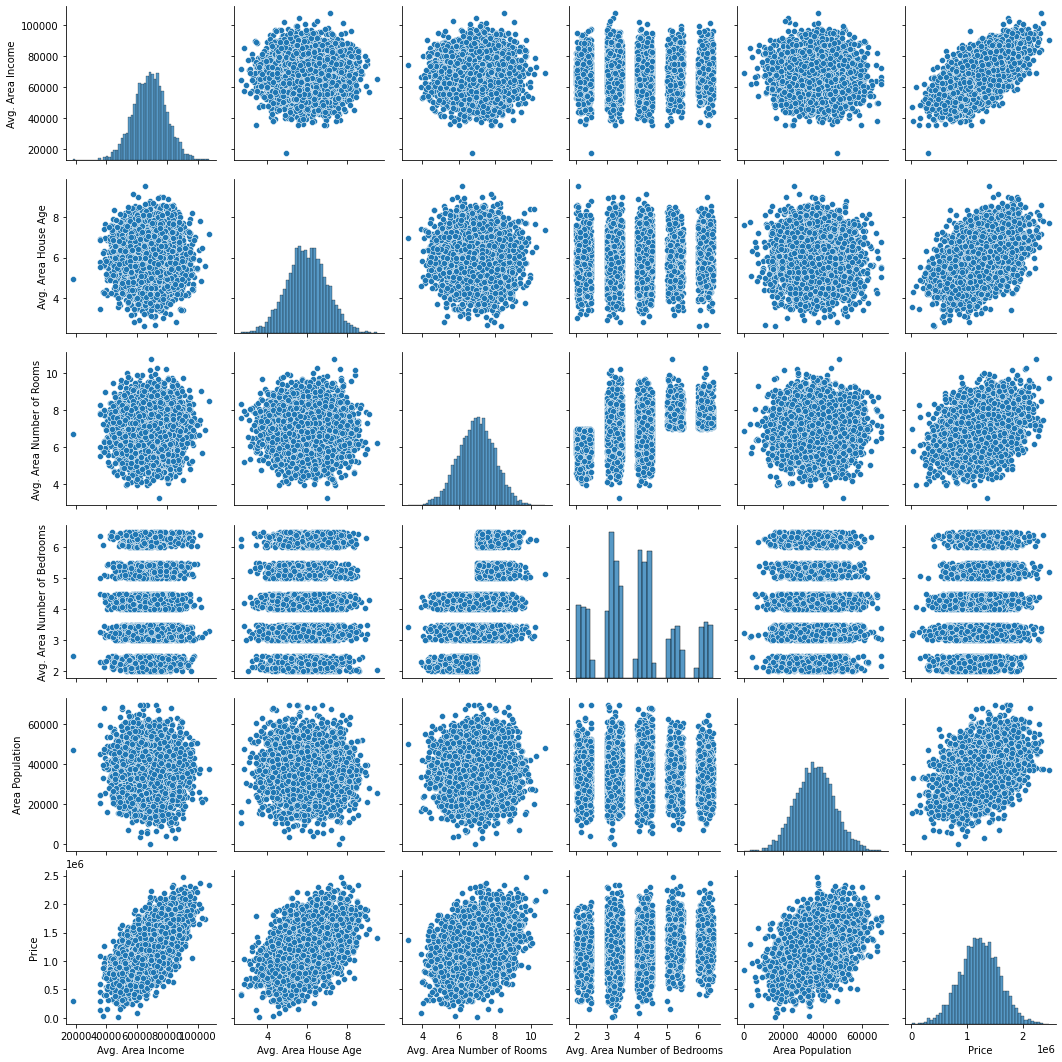

In [ ]:
#Relating every dependent and independent numerical columns in pairplot
sns.pairplot(df)

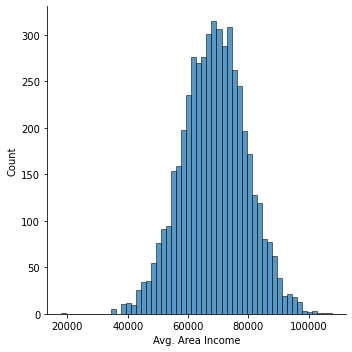

In [ ]:
sns.displot(df['Avg. Area Income'])

In [ ]:
# Counts average of area number of bedrooms


df['Avg. Area Number of Bedrooms'].value_counts()

4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.47     7
6.02     6
6.01     6
5.42     6
6.42     5
Name: Avg. Area Number of Bedrooms, Length: 255, dtype: int64

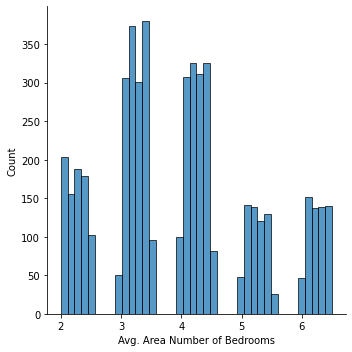

In [ ]:
sns.displot(df['Avg. Area Number of Bedrooms'], kde=False, bins=40)

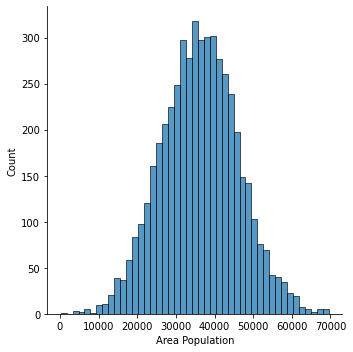

In [ ]:
sns.displot(df['Area Population'])

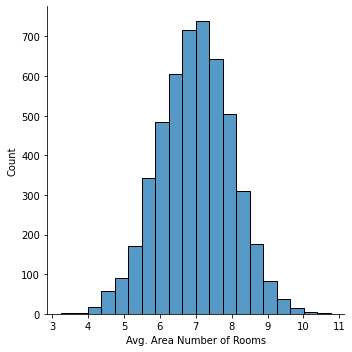

In [ ]:
sns.displot(df['Avg. Area Number of Rooms'], kde=False, bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


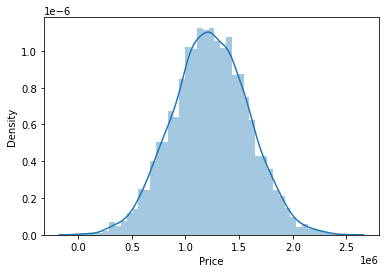

In [ ]:
sns.distplot(df['Price'])

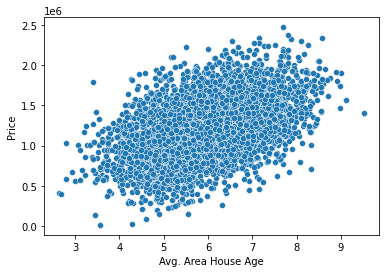

In [ ]:
# Comparing price according to average area of house age
sns.scatterplot(x=df['Avg. Area House Age'], y=df['Price'])

In [ ]:
# Counts average of area House Age

df['Avg. Area House Age'].value_counts()


6.150796    1
5.888005    1
5.959945    1
6.171113    1
6.844164    1
           ..
5.105172    1
3.942531    1
6.752351    1
7.031774    1
4.899966    1
Name: Avg. Area House Age, Length: 5000, dtype: int64

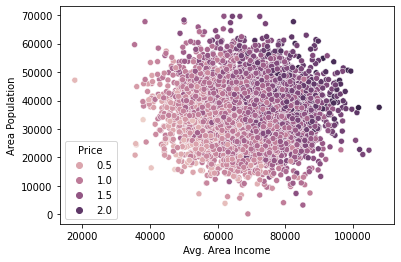

In [ ]:
sns.scatterplot(x=df['Avg. Area Income'], y=df['Area Population'], hue=df['Price'])

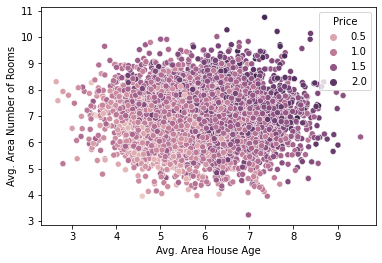

In [ ]:
sns.scatterplot(x=df['Avg. Area House Age'], y=df['Avg. Area Number of Rooms'], hue=df['Price'])

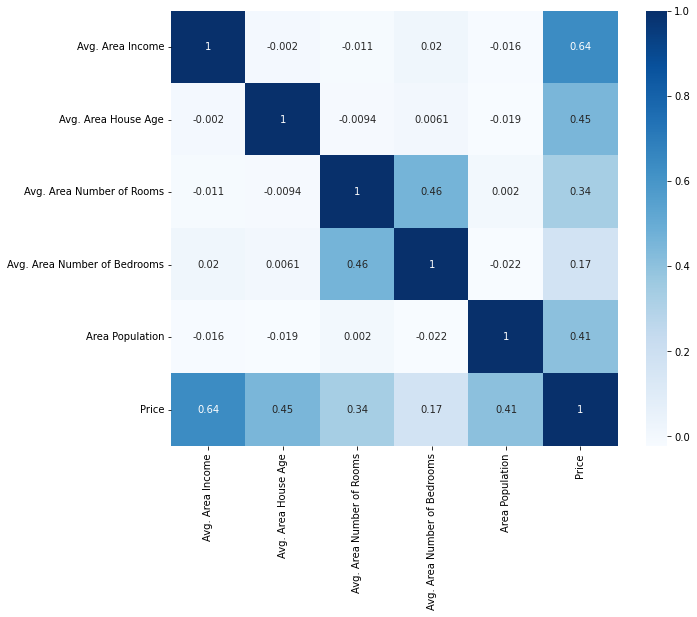

In [ ]:
#Displaying Correllation of each variable

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

Finally, we can visually relate the how different factors is effecting house price in USA in different Level.

# **Data Cleaning**

In [ ]:
#As the column 'Address' does not show any dependicies and is not possible to relate it with the value of house
#Removing the column 'Address'
df=df.drop(['Address'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


# **Training The Data**

In [ ]:
#Distributing target variable and its dependent variable in X and Y
X = df.drop(['Price'],axis=1)
Y = df['Price']
print(X.head(),Y.head())

   Avg. Area Income  ...  Area Population
0      79545.458574  ...     23086.800503
1      79248.642455  ...     40173.072174
2      61287.067179  ...     36882.159400
3      63345.240046  ...     34310.242831
4      59982.197226  ...     26354.109472

[5 rows x 5 columns] 0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


In [ ]:
#Normalizing the value of each variables
n = len(X.columns)
for i in range (0,n+1):
  X.iloc[:, :i]= X.iloc[:, :i]/np.max(X.iloc[:, :i])
X.head

<bound method NDFrame.head of       Avg. Area Income  ...  Area Population
0             0.738572  ...         0.331603
1             0.735816  ...         0.577019
2             0.569044  ...         0.529751
3             0.588154  ...         0.492810
4             0.556929  ...         0.378533
...                ...  ...              ...
4995          0.562367  ...         0.328021
4996          0.728784  ...         0.367933
4997          0.588576  ...         0.477813
4998          0.631386  ...         0.612246
4999          0.608259  ...         0.667914

[5000 rows x 5 columns]>

Creating Formula for theta

In [ ]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [ ]:
df.head()

,00,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,1,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,1,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
n = len(X.columns)
theta = np.array([0]*n)
theta

array([0, 0, 0, 0, 0])

In [ ]:
def hypothesis(theta,X):
  return theta*X

In [ ]:
y1 = theta*X

Implementing Gradient Descent

In [ ]:
m = len(df)
#Function for computing cost function
def ComputeCost(X,y,theta):
  y1= hypothesis(theta,X)
  y1=np.sum(y1,axis=1)
  add= (np.sum(y1-y)**2/(2*m))
  return np.sqrt(add) #RMSE

In [ ]:
#GradientDescent basically minimize errors by iterating itself 
#Loss Function
def gradientDescent(X, y, theta, alpha, i):
  J = [] #cost function in each iterations
  k = 0
  while k < i:
    y1 = hypothesis(theta, X)
    y1 = np.sum(y1, axis=1)
    for c in range(0, n):
      theta[c] = theta[c] - alpha*(sum((y1-y)*(X.iloc[:,c])/n))
    j = ComputeCost(X, y, theta)
    J.append(j)
    k += 1
  return J, j, theta

In [ ]:
J,j,theta = gradientDescent(X, Y,theta,0.0001,10000)

In [ ]:
#calculating the predicted values
y_pred = hypothesis(theta, X)
print(y_pred)
y_pred= np.sum(y_pred, axis=1)
print(y_pred)

      Avg. Area Income  ...  Area Population
0        813849.832657  ...    186685.116697
1        810813.031393  ...    324848.593288
2        627043.583146  ...    298237.524545
3        648101.273602  ...    277440.422550
4        613693.126540  ...    213105.319712
...                ...  ...              ...
4995     619686.052304  ...    184668.092460
4996     803064.216643  ...    207137.732613
4997     648566.251782  ...    268997.614116
4998     695738.927628  ...    344680.453758
4999     670255.436247  ...    376019.950983

[5000 rows x 5 columns]
0       1.241967e+06
1       1.392133e+06
2       1.166073e+06
3       1.254189e+06
4       1.028064e+06
            ...     
4995    1.161511e+06
4996    1.322864e+06
4997    1.252269e+06
4998    1.278477e+06
4999    1.305524e+06
Length: 5000, dtype: float64


In [ ]:
#accuracy of model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)
print(model.score(X,Y))

0.9180238195089553


Finally, The model can predict the price of USA house with the accuracy of 91.80%.

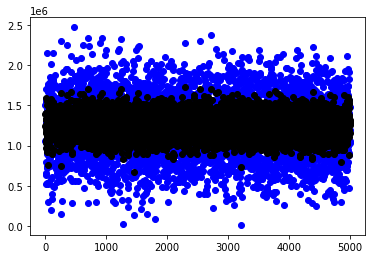

In [ ]:
from sklearn.metrics import r2_score

plt.figure()
plt.scatter(x=list(range(0,m)),y= Y,color='blue')
plt.scatter(x=list(range(0,m)), y=y_pred, color='black')
plt.show()

Here, we can see the scatter plot of actual price which is blue and the predicted price that is indicated black.